In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')

In [7]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
train.info()
# no nans.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [5]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [7]:
# EDA

In [6]:
# check for class imbalance
train['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

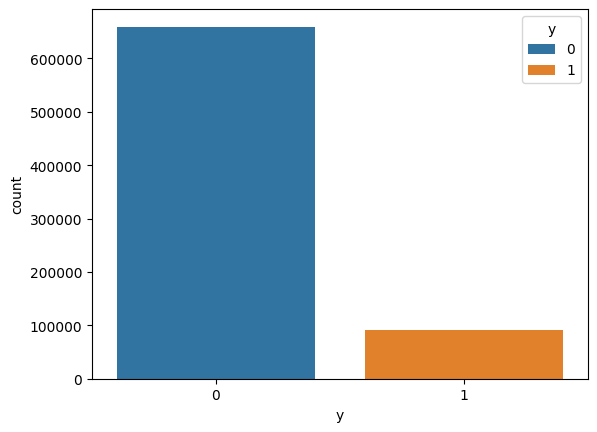

In [7]:
sns.countplot(train,x='y',hue='y') 

In [10]:
# CLASS IMBALANCE: YES, A LOT. '1' is the minority class

In [12]:
# DATA PREPROCESSING:

# CATEGORICAL ENCODING

In [13]:
# we'll check how many uniques, to see if one hot encoding (dummy vars) is good.
for col in train.select_dtypes('object').columns:
    print(f'{col} {len(train[col].unique())} : {train[col].unique()} \n')

job 12 : ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed'] 

marital 3 : ['married' 'single' 'divorced'] 

education 4 : ['secondary' 'primary' 'tertiary' 'unknown'] 

default 2 : ['no' 'yes'] 

housing 2 : ['no' 'yes'] 

loan 2 : ['no' 'yes'] 

contact 3 : ['cellular' 'unknown' 'telephone'] 

month 12 : ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec'] 

poutcome 4 : ['unknown' 'other' 'failure' 'success'] 



In [4]:
# not much uniques, safe to do dummy vars
train = pd.get_dummies(train,drop_first=True) 

In [14]:
train

,id,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,42,7,25,117,3,-1,0,0,False,...,False,False,False,False,False,False,False,False,False,True
1,1,38,514,18,185,1,-1,0,0,True,...,False,True,False,False,False,False,False,False,False,True
2,2,36,602,14,111,2,-1,0,0,True,...,False,False,False,True,False,False,False,False,False,True
3,3,27,34,28,10,2,-1,0,0,False,...,False,False,False,True,False,False,False,False,False,True
4,4,26,889,3,902,1,-1,0,1,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,1282,4,1006,2,-1,0,1,False,...,True,False,False,False,False,False,False,False,False,True
749996,749996,69,631,19,87,1,-1,0,0,False,...,False,False,False,False,False,False,False,False,False,True
749997,749997,50,217,17,113,1,-1,0,0,True,...,False,False,False,False,False,False,False,False,False,True
749998,749998,32,-274,26,108,6,-1,0,0,False,...,False,False,False,False,False,False,False,False,False,True


In [15]:
# SPLIT DATA
from sklearn.model_selection import train_test_split

X = train.drop('y', axis=1)
y = train['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
# MACHINE LEARNING

In [16]:
# We can choose: 
# logistic regression
# decision tree
# knn
# SVC linear
# SVM
# random forests
# boosting (Gradient boost,XGBOOST,LIGHTGBM)

In [ ]:
# 1 LOGISTIC REG:

In [6]:
from sklearn.linear_model import LogisticRegressionCV

In [24]:
model1 = LogisticRegressionCV(class_weight='balanced',random_state=101,max_iter=1000)

In [25]:
model1.fit(scaled_X_train,y_train)

,Cs,10
,fit_intercept,True
,cv,None
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,1000
,class_weight,'balanced'
,n_jobs,None


In [6]:
# we only care about the Roc score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [27]:
# we'll need proba preds, not class preds.
proba_preds1 = model1.predict_proba(scaled_X_test)[:, 1]

# '1' is the target class

0.9429693540361184


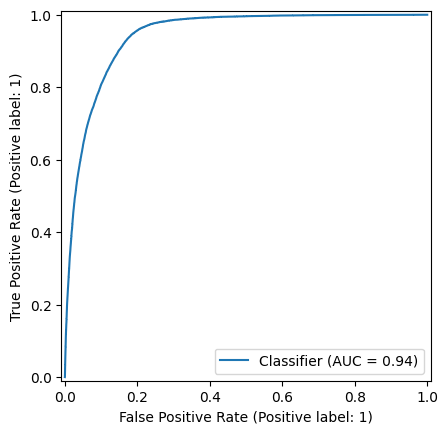

In [28]:
print(roc_auc_score(y_test,proba_preds1))
RocCurveDisplay.from_predictions(y_test,proba_preds1);

In [14]:
# so current ROC score == 0.943, we'll try boosted trees now

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [33]:
# We'll use cv stratified K folds instead of normal cv k folds, cuz its better on imbalanced classes

gradient_params1 = {'max_depth':range(6,13)}
gradient_model1 = GradientBoostingClassifier(n_estimators=128,learning_rate=0.05,random_state=101,max_features='sqrt') # max_features = sqrt is mathematically better

grid_gradient_model1 = GridSearchCV(gradient_model1,param_grid=gradient_params1,scoring='roc_auc',cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),n_jobs=-1) 

In [35]:
grid_gradient_model1.fit(scaled_X_train,y_train)

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'max_depth': range(6, 13)}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


0.964823701880444


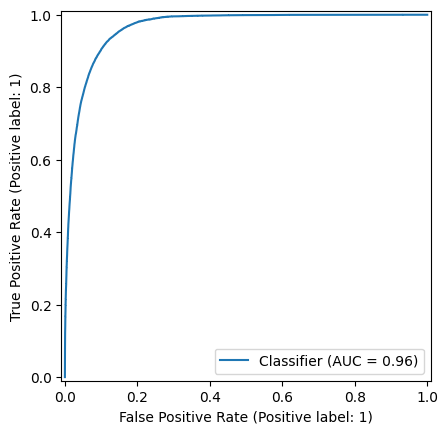

In [16]:
proba_preds1 = grid_gradient_model1.predict_proba(scaled_X_test)[:, 1]

RocCurveDisplay.from_predictions(y_test,proba_preds1)

print(roc_auc_score(y_test,proba_preds1))

In [ ]:
# current ROC score == 0.965 (previous 0.943), we'll try more estimators and lower learning rate.

In [33]:
# we'll just use max_depth = 12 here, so we'll just use a direct model (not empty grid search params, cuz it'll do cv and we dont need cv_results nor cv to choose best params)
gradient_model2 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=101,max_features='sqrt',max_depth=12) # because we dropped lr to 0.05, its better to do 500-1000 n_estimators, unlike random forests mathematical 64-128
gradient_model2.fit(scaled_X_train,y_train)


,loss,'log_loss'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,12
,min_impurity_decrease,0.0
,init,None


0.9672293780278455


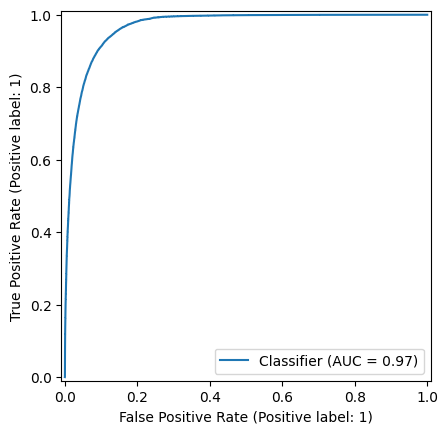

In [34]:
proba_preds2 = gradient_model2.predict_proba(scaled_X_test)[:,1]

RocCurveDisplay.from_predictions(y_test,proba_preds2)
print(roc_auc_score(y_test,proba_preds2))

In [ ]:
# current ROC score == 0.972 (previous 0.965), we'll try XGBOOST now

In [8]:
from xgboost import XGBClassifier

# Base model
xgb_model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3, # minimum dp that should be present in each node for another split to happen, and for classification it uses minimum purity.
    gamma=0.1, #  higher gamma == makes splitting more conservative == simpler the tree == less overfitting, 
    subsample=0.8, # percent of how many data points used to build each tree
    colsample_bytree=0.8, # percent of how many features used to build each tree
    scale_pos_weight=7,   # cuz we have around 1:7 imbalance
    eval_metric="auc", 
    random_state=101,
    tree_method='hist',  # 'hist' much faster than default ('exact'), slight loss of precision, but negligible, with a huge speed boost
    device='cuda'
)
 

In [9]:
xgb_model.fit(scaled_X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


0.9670836011186852


C:\Users\touto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\core.py:729: UserWarning: [11:50:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


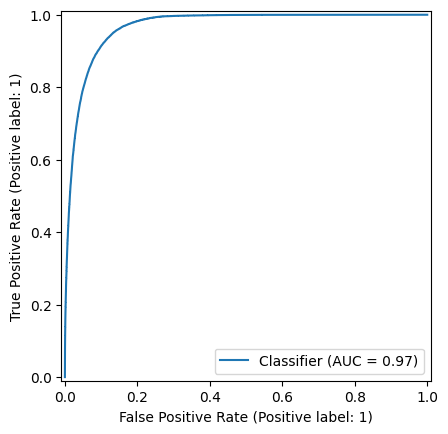

In [41]:
proba_preds3 = xgb_model.predict_proba(scaled_X_test)[:,1]

RocCurveDisplay.from_predictions(y_test,proba_preds3)
print(roc_auc_score(y_test,proba_preds3))

In [42]:
# current ROC score == 0.9670 (previous 0.9672) but this was extremly faster. we'll try more n_estimators and lower lr

In [48]:

# Base model
xgb_model2 = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=3, # minimum dp that should be present in each node for another split to happen, and for classification it uses minimum purity.
    gamma=0.1, #  higher gamma == makes splitting more conservative == simpler the tree == less overfitting, 
    subsample=0.8, # percent of how many data points used to build each tree
    colsample_bytree=0.8, # percent of how many features used to build each tree
    scale_pos_weight=7,   # cuz we have around 1:7 imbalance
    eval_metric="auc", 
    random_state=101,
    tree_method='hist',  # 'hist' much faster than default ('exact'), slight loss of precision, but negligible, with a huge speed boost
    device='cuda'
)
xgb_model2.fit(scaled_X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


0.9658254887555185


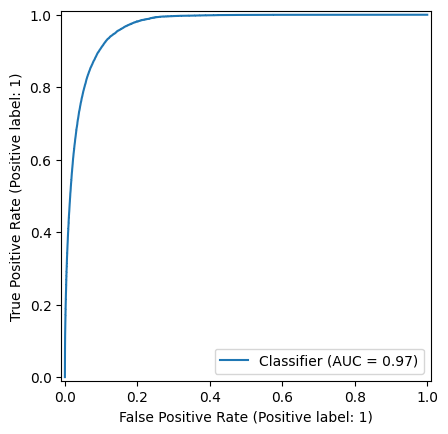

In [49]:
proba_preds4 = xgb_model2.predict_proba(scaled_X_test)[:,1]

RocCurveDisplay.from_predictions(y_test,proba_preds4)
print(roc_auc_score(y_test,proba_preds4))

In [ ]:
# CURRENT ROC 0.966 (0.9670 previous), even though its lower, its generally more stable, less overfit

In [53]:
# XGBoost with stop early (just for learning)


# split on that scaled X and y. early stop stuff is this split, and when doing .fit():
X_tr, X_val, y_tr, y_val = train_test_split(
    scaled_X_train, y_train,
    test_size=0.2, stratify=y_train, random_state=101
)


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split
X_tr, X_val, y_tr, y_val = train_test_split(
    scaled_X_train, y_train,
    test_size=0.2, stratify=y_train, random_state=101
)

xgb_model3 = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=7,
    eval_metric="auc",
    random_state=101,
    tree_method="hist",
    device='cuda',
    max_depth=6,
    min_child_weight=3,
    gamma=0.1,
    early_stopping_rounds=200  # stop if val AUC doesn't improve for 200 rounds
)


In [54]:
xgb_model3.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)], # the early stopping validation set
    verbose=None
)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,200
,enable_categorical,False
,eval_metric,'auc'


0.9656451550061809


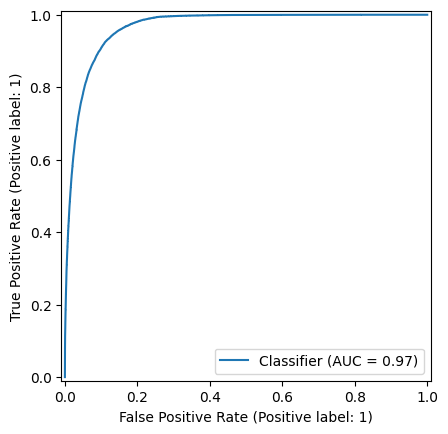

In [56]:
proba_preds5 = xgb_model3.predict_proba(scaled_X_test)[:,1]

RocCurveDisplay.from_predictions(y_test,proba_preds5)
print(roc_auc_score(y_test,proba_preds5))

In [57]:
# same ROC 0.966, just faster theoretically with early stop

In [62]:
# early_stop with grid search NO CV (for learning) 
from itertools import product


# split on that scaled X and y. early stop stuff is this split, and when doing .fit():
X_tr, X_val, y_tr, y_val = train_test_split(
    scaled_X_train, y_train,
    test_size=0.2, stratify=y_train, random_state=101
)

# Parameter grid
param_grid = {
    "max_depth": [6,8],
    "min_child_weight": [1,3],
    "gamma": [0,0.25],
    "colsample_bytree": [0.8,1.0],
    "subsample": [0.8,1.0]
}

# Generate all combinations
param_combinations = list(product(
    param_grid["max_depth"],
    param_grid["min_child_weight"],
    param_grid["gamma"],
    param_grid["subsample"],
    param_grid["colsample_bytree"]
))

best_score = 0
best_params = None

for max_depth, min_child_weight, gamma, subsample, colsample_bytree in param_combinations:
    xgb_modelx = XGBClassifier(
        n_estimators=2000,
        learning_rate=0.01,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        scale_pos_weight=7,
        random_state=101,
        tree_method="hist",  
        device="cuda",
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        eval_metric="auc",           
        early_stopping_rounds=200    
    )
    
    xgb_modelx.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        verbose=None
    )
    
    score = xgb_modelx.best_score
    print(f"Params: {max_depth}, {min_child_weight}, {gamma}, {subsample}, {colsample_bytree} --> AUC: {score}")
    
    if score > best_score:
        best_score = score
        best_params = (max_depth, min_child_weight, gamma, subsample, colsample_bytree)

print("Best score:", best_score) # we could do this to see the val split score, it uses it for choosing which candidate is the best.
print("Best params:", best_params) # Best params: (8, 3, 0, 0.8, 0.8)


In [65]:
# why this and not directly .fit(scaled....) ? cuz we have the best iteration from the early stop model, it'll save the time

# Get params from early stopping model
params = xgb_modelx.get_params()

# Remove early stopping / eval_set keys that cause issues
params.pop("early_stopping_rounds", None)
params.pop("eval_set", None)
params.pop("eval_metric", None)  # optional
params['n_estimators'] = xgb_modelx.best_iteration  # use best_iteration


xgb_model4 = XGBClassifier(**params) # '**' to unpack a dict to a funct keyword args.
xgb_model4.fit(scaled_X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


0.9666450344172468


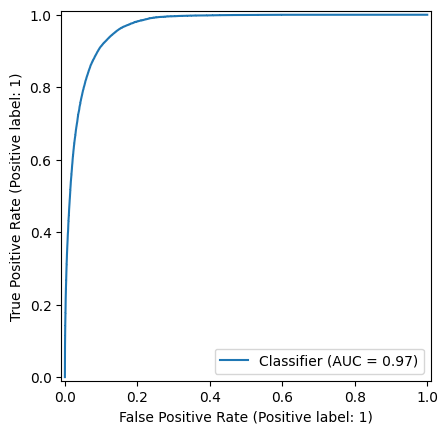

In [66]:
proba_preds6 = xgb_model4.predict_proba(scaled_X_test)[:,1]

RocCurveDisplay.from_predictions(y_test,proba_preds6)
print(roc_auc_score(y_test,proba_preds6))

In [ ]:
# 0.966, but with early stopping + hyper params searching

In [67]:
# now with randomized CV (stratified k folds) (just for learning):
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Base model
xgb_model5 = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=3, 
    gamma=0.1, 
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=7,  
    eval_metric="auc", 
    random_state=101,
    tree_method='hist',  
    device='cuda'
)
param_grid = {
    "max_depth": [6,7,8,9,10],
    "min_child_weight": [1,2,3,5],
    "gamma": [0,0.25,0.1,0.5],
    "colsample_bytree": [0.7,0.8,0.9,1.0],
    "subsample": [0.7,0.8,0.9,1.0]
}

grid_xgb_model5 = RandomizedSearchCV(xgb_model5,param_grid,n_iter=300,scoring='roc_auc',cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=101),n_jobs=-1) # number of comobs = n_iter


grid_xgb_model5.fit(scaled_X_train, y_train)

In [ ]:
proba_preds7 = grid_xgb_model5.predict_proba(scaled_X_test)[:,1]

RocCurveDisplay.from_predictions(y_test,proba_preds7)
print(roc_auc_score(y_test,proba_preds7))

In [84]:
# if we want to go even further, we'll need meta learning (stacking mutliple strong models (xgboost, lightgbm...) to teach the final model)

In [16]:
# we'll chose xgb_model (the first one)
test = pd.read_csv('test.csv')
test = pd.get_dummies(test,drop_first=True) 

In [17]:
scaled_final_test = scaler.transform(test)

In [18]:
proba_preds = xgb_model.predict_proba(scaled_final_test)[:,1]

C:\Users\touto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\core.py:729: UserWarning: [14:29:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [24]:
submission = pd.DataFrame({
    "id": test["id"],       # or whatever ID column your test file has
    "y": proba_preds  # or class_preds if needed
})

submission.to_csv("submission.csv", index=False)

![My Results](submission.png)